In [212]:
%matplotlib inline
import numpy
from numpy.fft import fft
import scipy.io.wavfile
import math 

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk


maximální hodnota je  0.1806640625
minimální hodnota je  -0.183929443359375
délka ve vzorcích je 39015
Délka v sekundách je 2.438375


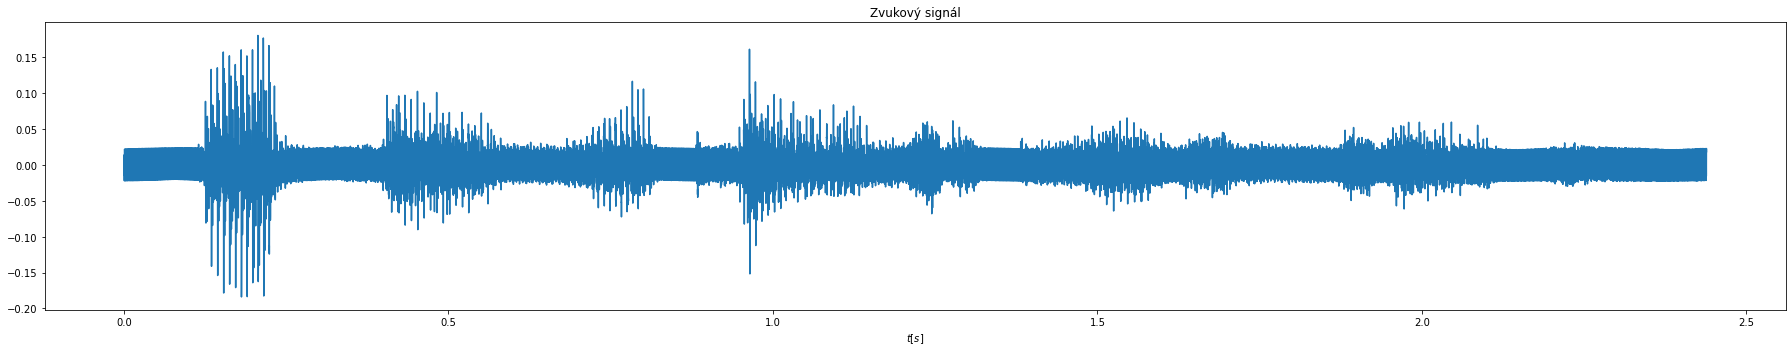

In [214]:
s, fs = sf.read('xrezni29.wav')
IPython.display.display(IPython.display.Audio(s, rate=fs))
print("maximální hodnota je ",max(s))
print("minimální hodnota je ",min(s))
t = np.arange(s.size) / fs
print("délka ve vzorcích je",len(s))
print("Délka v sekundách je",t[-1])
plt.figure(figsize=(25,5))
plt.plot(t, s)
plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()


[]
77


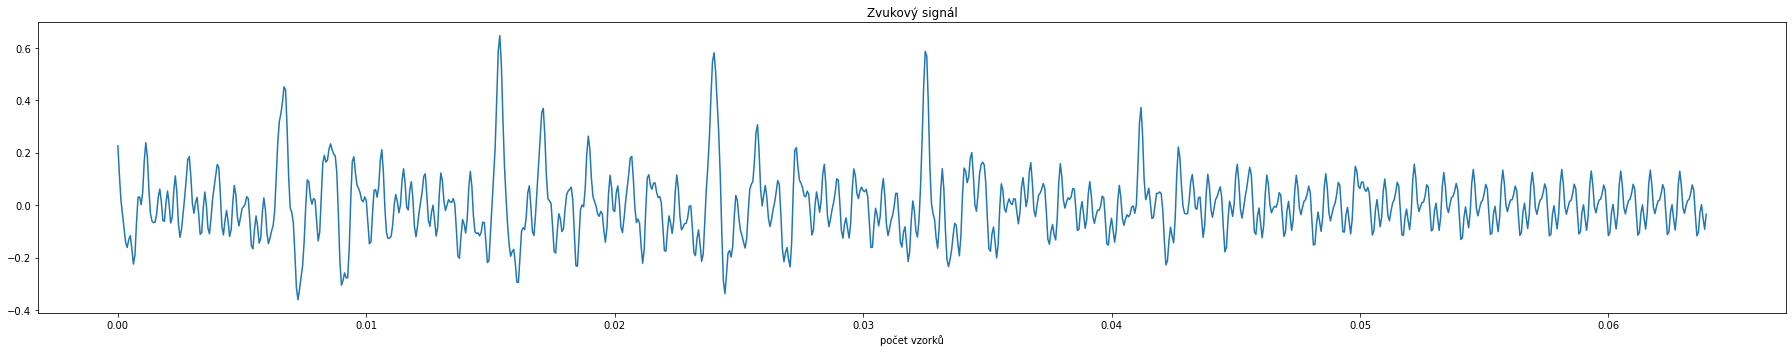

In [215]:
r = []
cnt = 0 
q = 0
counter_pr2 = 0
counter_pr2_2 = 0
d = abs(max(s))
for i in range(len(s)):
  s[i] = s[i]-1/len(s)*s[i]
  s[i] = s[i]/d

for i in range(int((len(s))/512)+1):
  r.append([])
print(r[-1])
for i in range(len(s)):
  r[counter_pr2].append(s[i-counter_pr2_2])
  q+=1
  if q == 1024:
    q=0
    counter_pr2+=1
    counter_pr2_2+=512

print(len(r))
plt.figure(figsize=(25,5))
t= np.arange(len(r[24])) / fs
plt.plot(t,r[24])
plt.gca().set_xlabel('počet vzorků')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()


Is DFT close to fft? True


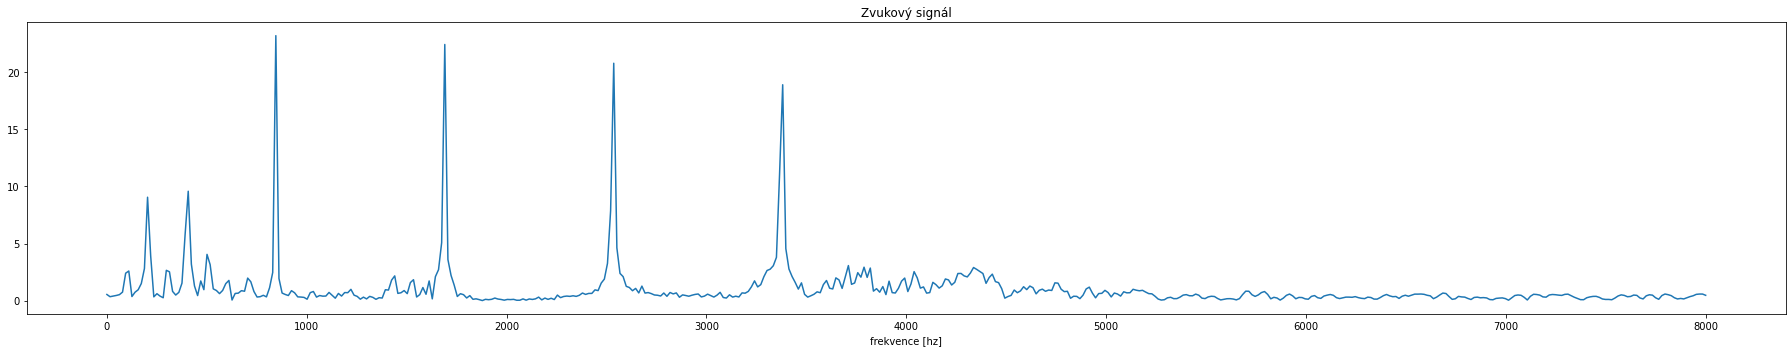

In [216]:
def DFT(x):
    N = numpy.size(x)
    X = numpy.zeros((N,),dtype=numpy.complex128)
    for m in range(0,N):    
        for n in range(0,N): 
            X[m] += x[n]*numpy.exp(-numpy.pi*2j*m*n/N)
    return X
x = r[36][:1024]
np
x2 = numpy.fft.fft(x)
x=DFT(x)
x = abs(x[:512])
frequency = np.linspace (0.0, 8000, 512)
plt.figure(figsize=(25,5))
plt.plot(frequency,x)
plt.gca().set_xlabel('frekvence [hz]')
plt.gca().set_title('Zvukový signál')
plt.tight_layout()

print('Is DFT close to fft?',numpy.allclose(x - abs(x2[:512]),1e-12))


C:\Users\hos24\AppData\Local\Temp/ipykernel_13456/1731220416.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sgr_log)


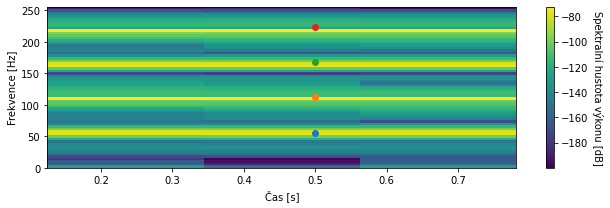

In [217]:
arr = numpy.array(r[26])
f, t, sgr = spectrogram(arr, len(arr))
# prevod na PSD
# (ve spektrogramu se obcas objevuji nuly, ktere se nelibi logaritmu, proto +1e-20)
sgr_log = 10 * np.log10(sgr*sgr+1e-20) 
f1=56
f2=112
f3=168
f4=224
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
ax = plt.gca()
ax.set_ylim([0, f[-1]/2])
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()
plt.scatter(0.5,f1)
plt.scatter(0.5,f2)
plt.scatter(0.5,f3)
plt.scatter(0.5,f4)


C:\Users\hos24\AppData\Local\Temp/ipykernel_13456/2316499085.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sgr_log)


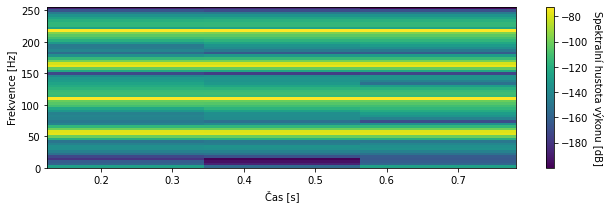

In [218]:


plt.figure(figsize=(9,3))

plt.pcolormesh(t,f,sgr_log)

ax = plt.gca()
ax.set_ylim([0, f[-1]/2])
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

C:\Users\hos24\AppData\Local\Temp/ipykernel_13456/137214081.py:61: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,f,sfgr_log)


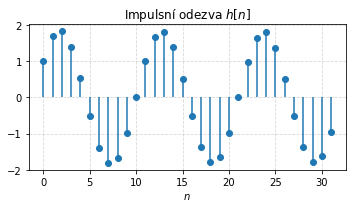

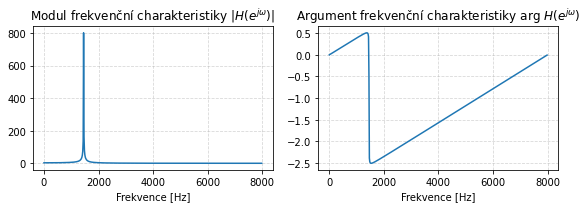

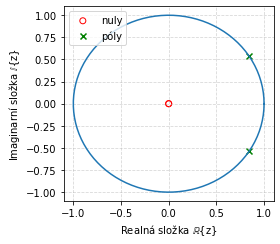

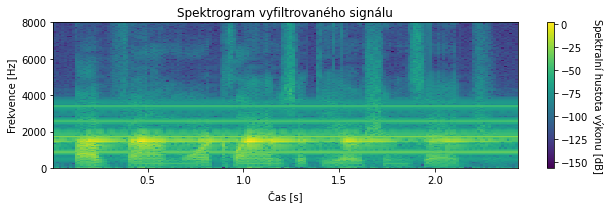

In [223]:
b = [0.2, 0.2, 0.2, 0.2, 0.2]
a = [1, 0, 0, 0, 0]
# impulsni odezva
N_imp = 32
imp = [1, *np.zeros(N_imp-1)] # jednotkovy impuls
h = lfilter(b, a, imp)

# frekvencni charakteristika
w, H = freqz(b, a)

# nuly, poly
z, p, k = tf2zpk(b, a)

# stabilita
is_stable = (p.size == 0) or np.all(np.abs(p) < 1) 

# filtrace
sf = lfilter(b, a, s)
f, t, sfgr = spectrogram(sf, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)
plt.figure(figsize=(5,3))
plt.stem(np.arange(N_imp), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()
plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)
scipy.io.wavfile.write('xenencounter_23sin3.wav',fs,s)
plt.tight_layout()